In [1]:
# Importing dependencies
import requests
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [6]:
# File to Load (Remember to Change These)
crime_data_2020 = "Data/Crime_Incidents_in_2020.csv"
crime_data_2021 = "Data/Crime_Incidents_in_2021.csv"

In [7]:
# Read School and Student Data File and store into Pandas Data Frames
crime_data_2020 = pd.read_csv(crime_data_2020)
crime_data_2021 = pd.read_csv(crime_data_2021)

In [8]:
# Convert Dataset into Dataframe 
crime_data_df = pd.DataFrame(crime_data_2020)
crime_data_df.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-77.044182,38.905654,11139598,2020/08/24 04:00:00+00,MIDNIGHT,OTHERS,HOMICIDE,1900 - 1999 BLOCK OF M STREET NW,396168.0,137533.0,...,010700 1,10700.0,Precinct 17,38.905646,-77.044180,GOLDEN TRIANGLE,2011/09/23 06:40:00+00,NaN,570698887,NaN
1,-76.972651,38.857491,10251445,2020/09/11 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,2300 - 2399 BLOCK OF AINGER PLACE SE,402374.0,132186.0,...,007502 1,7502.0,Precinct 134,38.857483,-76.972648,NaN,2010/09/02 04:00:00+00,2010/09/02 04:00:00+00,570698997,NaN
2,-77.030788,38.911874,16641,2020/01/28 05:14:39+00,MIDNIGHT,OTHERS,THEFT F/AUTO,1300 - 1399 BLOCK OF CORCORAN STREET NW,397330.0,138223.0,...,005001 2,5001.0,Precinct 16,38.911866,-77.030785,NaN,2020/01/28 05:14:58+00,2020/01/28 05:15:02+00,570699000,NaN
3,-76.972226,38.854086,10147537,2020/12/21 05:00:00+00,MIDNIGHT,OTHERS,HOMICIDE,2300 - 2499 BLOCK OF HARTFORD STREET SE,402411.0,131808.0,...,007408 2,7408.0,Precinct 115,38.854078,-76.972223,NaN,2010/10/10 02:00:00+00,NaN,570699004,NaN
4,-77.001753,38.821632,18048023,2020/10/21 04:00:00+00,MIDNIGHT,OTHERS,HOMICIDE,4600 - 4799 BLOCK OF SOUTH CAPITOL STREET,399848.0,128205.0,...,009811 1,9811.0,Precinct 125,38.821624,-77.001750,NaN,2018/03/26 08:40:06+00,2018/03/26 10:04:44+00,570700076,NaN


In [10]:
# Convert Dataset into Dataframe
crime_data_df2 = pd.DataFrame(crime_data_2021)
crime_data_df2.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-77.034107,38.902522,15003190,2021/10/21 04:08:27+00,MIDNIGHT,OTHERS,THEFT F/AUTO,1434 - 1499 BLOCK OF K STREET NW,397041.7,137184.93,...,010100 1,10100.0,Precinct 129,38.902514,-77.034105,DOWNTOWN,2021/10/21 00:40:00+00,2021/10/21 02:00:00+00,570148262,NaN
1,-77.068637,38.932082,11048862,2021/10/13 21:24:42+00,EVENING,OTHERS,THEFT F/AUTO,3100 - 3199 BLOCK OF 35TH STREET NW,394049.0,140468.00,...,000600 3,600.0,Precinct 27,38.932074,-77.068635,NaN,2021/10/13 14:00:00+00,2021/10/13 15:15:00+00,570148266,NaN
2,-76.985601,38.912526,12113231,2021/08/12 12:00:17+00,DAY,OTHERS,THEFT/OTHER,1800 - 1899 BLOCK OF CENTRAL PLACE NE,401249.0,138295.00,...,008803 1,8803.0,Precinct 76,38.912518,-76.985599,NaN,2021/08/11 14:30:00+00,2021/08/12 04:00:00+00,570148270,NaN
3,-76.989349,38.905932,11124202,2021/09/01 12:39:59+00,DAY,OTHERS,THEFT/OTHER,1100 - 1199 BLOCK OF OATES STREET NE,400924.0,137563.00,...,008802 3,8802.0,Precinct 77,38.905924,-76.989347,NaN,2021/09/01 01:36:00+00,NaN,570148273,NaN
4,-76.975322,38.896552,21182177,2021/12/14 17:04:14+00,DAY,OTHERS,THEFT/OTHER,2000 - 2099 BLOCK OF ROSEDALE STREET NE,402141.0,136522.00,...,007903 1,7903.0,Precinct 80,38.896544,-76.975319,NaN,2021/12/09 13:00:00+00,2021/12/10 02:00:00+00,570172669,NaN


In [11]:
# Group by 'Offense' and 'Shift' to get counts of crime incidents per shift for 2020
crime_data_offense = crime_data_2020.groupby(['OFFENSE', 'SHIFT']).count()
crime_data_offense.head()

X    Y  CCN  REPORT_DAT  METHOD  BLOCK  \
OFFENSE                    SHIFT                                                
ARSON                      DAY         4    4    4           4       4      4   
                           EVENING     7    7    7           7       7      7   
                           MIDNIGHT    2    2    2           2       2      2   
ASSAULT W/DANGEROUS WEAPON DAY       318  318  318         318     318    318   
                           EVENING   661  661  661         661     661    661   

                                     XBLOCK  YBLOCK  WARD  ANC  ...  \
OFFENSE                    SHIFT                                ...   
ARSON                      DAY            4       4     4    4  ...   
                           EVENING        7       7     7    7  ...   
                           MIDNIGHT       2       2     2    2  ...   
ASSAULT W/DANGEROUS WEAPON DAY          318     318   318  318  ...   
                           EVENING      661     661   661  661  ...   

                                     BLOCK_GROUP  CENSUS_TRACT  \
OFFENSE                    SHIFT                                 
ARSON                      DAY                 4             4   
                           EVENING             7             7   
                           MIDNIGHT            2             2   
ASSAULT W/DANGEROUS WEAPON DAY               318           318   
                           EVENING           661           661   

                                     VOTING_PRECINCT  LATITUDE  LONGITUDE  \
OFFENSE                    SHIFT                                            
ARSON                      DAY                     4         4          4   
                           EVENING                 7         7          7   
                           MIDNIGHT                2         2          2   
ASSAULT W/DANGEROUS WEAPON DAY                   318       318        318   
                           EVENING               661       661        661   

                                     BID  START_DATE  END_DATE  OBJECTID  \
OFFENSE                    SHIFT                                           
ARSON                      DAY         2           4         4         4   
                           EVENING     1           7         7         7   
                           MIDNIGHT    1           2         1         2   
ASSAULT W/DANGEROUS WEAPON DAY        36         318       209       318   
                           EVENING    72         661       489       661   

                                     OCTO_RECORD_ID  
OFFENSE                    SHIFT                     
ARSON                      DAY                    0  
                           EVENING                0  
                           MIDNIGHT               0  
ASSAULT W/DANGEROUS WEAPON DAY                    0  
                           EVENING                0  

[5 rows x 23 columns]

In [12]:
# Group by 'Offense' and 'Shift' to get counts of crime incidents per shift for 2021
crime_data_offense2 = crime_data_2021.groupby(['OFFENSE', 'SHIFT']).count()
crime_data_offense2.head()

X    Y  CCN  REPORT_DAT  METHOD  BLOCK  \
OFFENSE                    SHIFT                                                
ARSON                      DAY         2    2    2           2       2      2   
                           EVENING     1    1    1           1       1      1   
                           MIDNIGHT    1    1    1           1       1      1   
ASSAULT W/DANGEROUS WEAPON DAY       321  321  321         321     321    321   
                           EVENING   685  685  685         685     685    685   

                                     XBLOCK  YBLOCK  WARD  ANC  ...  \
OFFENSE                    SHIFT                                ...   
ARSON                      DAY            2       2     2    2  ...   
                           EVENING        1       1     1    1  ...   
                           MIDNIGHT       1       1     1    1  ...   
ASSAULT W/DANGEROUS WEAPON DAY          321     321   321  321  ...   
                           EVENING      685     685   684  685  ...   

                                     BLOCK_GROUP  CENSUS_TRACT  \
OFFENSE                    SHIFT                                 
ARSON                      DAY                 2             2   
                           EVENING             1             1   
                           MIDNIGHT            1             1   
ASSAULT W/DANGEROUS WEAPON DAY               320           320   
                           EVENING           684           684   

                                     VOTING_PRECINCT  LATITUDE  LONGITUDE  \
OFFENSE                    SHIFT                                            
ARSON                      DAY                     2         2          2   
                           EVENING                 1         1          1   
                           MIDNIGHT                1         1          1   
ASSAULT W/DANGEROUS WEAPON DAY                   321       321        321   
                           EVENING               685       685        685   

                                     BID  START_DATE  END_DATE  OBJECTID  \
OFFENSE                    SHIFT                                           
ARSON                      DAY         0           2         2         2   
                           EVENING     0           1         0         1   
                           MIDNIGHT    0           1         1         1   
ASSAULT W/DANGEROUS WEAPON DAY        33         321       241       321   
                           EVENING    79         685       536       685   

                                     OCTO_RECORD_ID  
OFFENSE                    SHIFT                     
ARSON                      DAY                    0  
                           EVENING                0  
                           MIDNIGHT               0  
ASSAULT W/DANGEROUS WEAPON DAY                    0  
                           EVENING                0  

[5 rows x 23 columns]

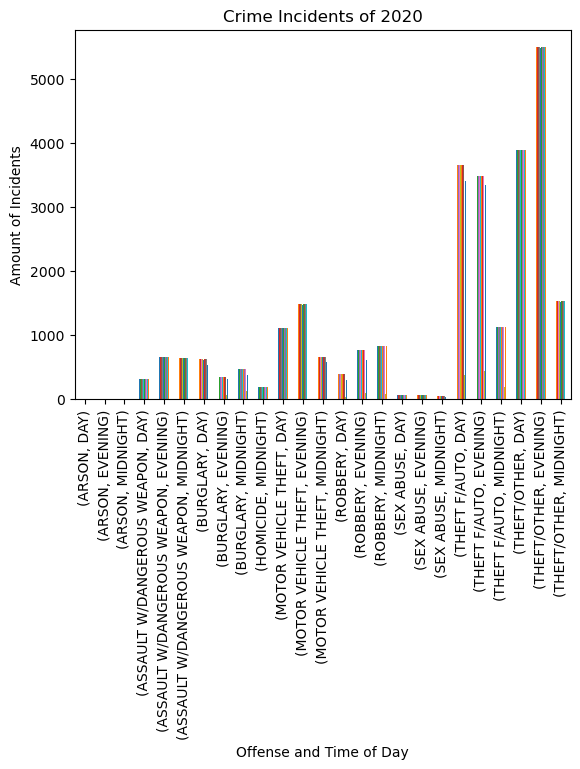

In [36]:
# Plot Crime Incidents 2020 data   #### Maybe some more cleanup to be done for easier legibility
crime_data_offense.plot(kind= "bar", legend=False, rot= 90)

plt.title('Crime Incidents of 2020')
plt.xlabel('Offense and Time of Day')
plt.ylabel('Amount of Incidents')

# Display plot
plt.show()

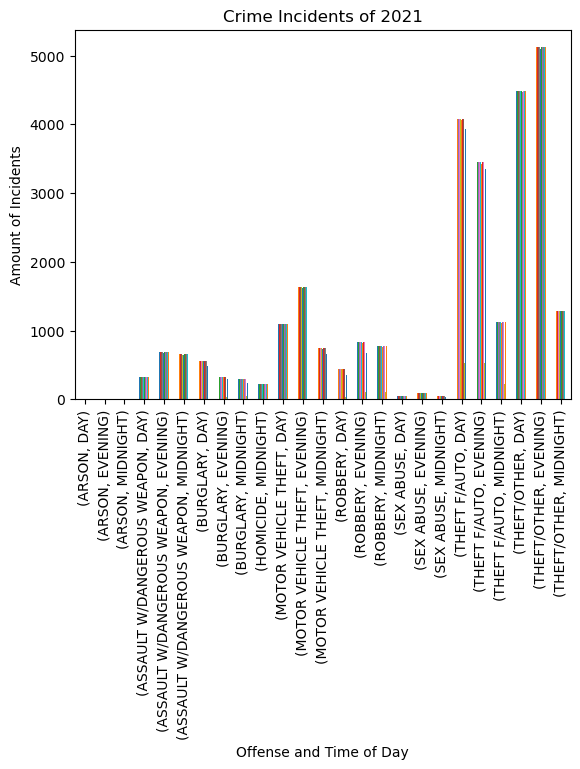

In [35]:
# Plot Crime Incidents 2021 data   #### Also maybe some more cleanup
crime_data_offense2.plot(kind= "bar", legend=False, rot= 90)

plt.title('Crime Incidents of 2021')
plt.xlabel('Offense and Time of Day')
plt.ylabel('Amount of Incidents')

# Display plot
plt.show()